In [132]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [134]:
to_drop = ['job', 'default',
           'contact', 
           'day',
           'month',
           'pdays',
           'previous',
           'poutcome']

#Melakukan drop pada data yang dipilih
df.drop(to_drop, inplace=True, axis=1)

In [135]:
df.head()

,age,marital,education,balance,housing,loan,duration,campaign,deposit
0,59,married,secondary,2343,yes,no,1042,1,yes
1,56,married,secondary,45,no,no,1467,1,yes
2,41,married,secondary,1270,yes,no,1389,1,yes
3,55,married,secondary,2476,yes,no,579,1,yes
4,54,married,tertiary,184,no,no,673,2,yes


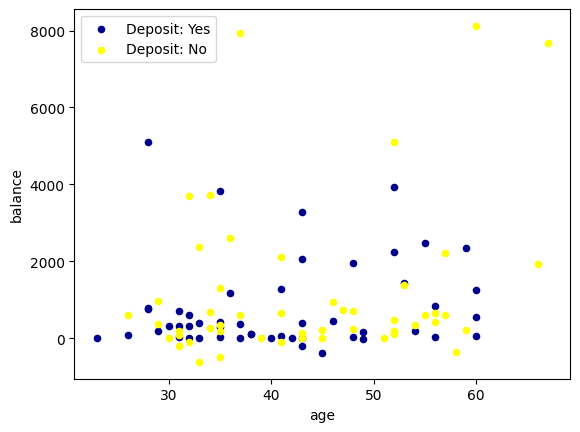

In [136]:
ax = df[df['deposit'] == 'yes'][0:50].plot(kind='scatter', x='age', y='balance', color='DarkBlue', label='Deposit: Yes')
df[df['deposit'] == 'no'][0:50].plot(kind='scatter', x='age', y='balance', color='Yellow', label='Deposit: No', ax=ax)
plt.show()

In [137]:
df.dtypes

age           int64
marital      object
education    object
balance       int64
housing      object
loan         object
duration      int64
campaign      int64
deposit      object
dtype: object

In [138]:
df.columns

Index(['age', 'marital', 'education', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'deposit'],
      dtype='object')

In [139]:
feature_df = df[['age', 'balance', 'duration', 'campaign']]
X = np.asarray(feature_df)
X[0:5]

array([[  59, 2343, 1042,    1],
       [  56,   45, 1467,    1],
       [  41, 1270, 1389,    1],
       [  55, 2476,  579,    1],
       [  54,  184,  673,    2]], dtype=int64)

In [140]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Mengubah kolom 'kolom_string' menjadi integer
df['deposit'] = le.fit_transform(df['deposit'])

In [141]:
df['deposit'] = df['deposit'].astype('int')
y = np.asarray(df['deposit'])
y [0:5]

array([1, 1, 1, 1, 1])

### Train atau Test Dataset

In [142]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8929, 4) (8929,)
Test set: (2233, 4) (2233,)


### Modelling

In [143]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train) 

SVC(gamma='auto')

In [144]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

### Evaluation

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [146]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.53      0.99      0.69      1173
           1       0.51      0.02      0.03      1060

    accuracy                           0.53      2233
   macro avg       0.52      0.50      0.36      2233
weighted avg       0.52      0.53      0.38      2233

Confusion matrix, without normalization
[[18  0]
 [ 0  0]]


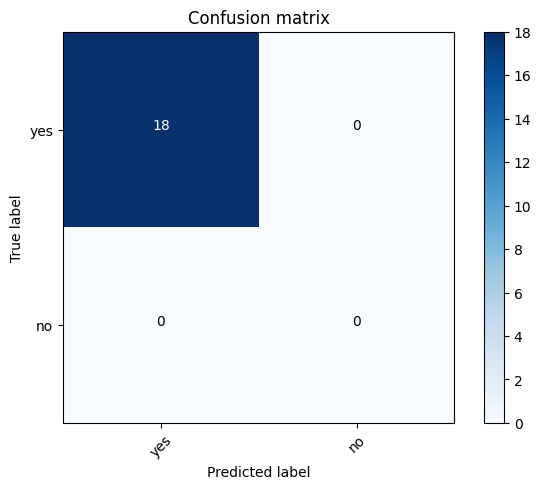

In [157]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 2])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes', 'no'], normalize=False, title='Confusion matrix')

In [148]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.37588501714272565

In [149]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat, average='macro')

0.2693046272251111